In [1]:
import HARK.ConsumptionSaving.ConsPortfolioFrameModel as cpfm
import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
import numpy as np

from HARK.utilities import (
    CRRAutility,
)

The `FrameAgentType` is an alternative way to specify a model.

The library contains a demonstration of this form of model, `ConsPortfolioFrameModel`, which is a replica of the `ConsPortfolioModel`.

This notebook compares the results of simulations of the two models.

In [2]:
pct = cpm.PortfolioConsumerType(T_sim=5000, AgentCount=200)
pct.cycles = 0

# Solve the model under the given parameters

pct.solve()
pct.track_vars += [
    "mNrm",
    "cNrm",
    "Share",
    "aNrm",
    "Risky",
    "Adjust",
    "PermShk",
    "TranShk",
    "bNrm",
    "who_dies"
]

pct.initialize_sim()

pct.simulate()

{'mNrm': array([[8.7164524 , 2.03325586, 2.63518356, ..., 3.66314291, 1.96457511,
         2.35682562],
        [7.53817219, 2.10354946, 2.51176215, ..., 3.2255641 , 1.79321031,
         2.25975664],
        [7.51741489, 1.32173512, 2.58676818, ..., 2.99232575, 1.99446962,
         2.085719  ],
        ...,
        [3.47925873, 2.56314177, 1.93842952, ..., 6.60156314, 1.67634494,
         1.43386995],
        [3.19125417, 2.22548497, 1.69446655, ..., 5.0391381 , 1.46729786,
         1.51017973],
        [4.05322325, 2.57326362, 2.02879211, ..., 7.1191511 , 1.66825219,
         1.80758315]]),
 'cNrm': array([[1.60847121, 1.02920493, 1.10094396, ..., 1.20301058, 1.01974637,
         1.06965997],
        [1.52197254, 1.03849272, 1.08737054, ..., 1.1613557 , 0.99426674,
         1.05809853],
        [1.5204159 , 0.89849016, 1.09566232, ..., 1.1382064 , 1.02390805,
         1.0361757 ],
        ...,
        [1.18575266, 1.09307623, 1.01606525, ..., 1.45044543, 0.97480759,
         0.9260751

In [3]:
shock_history = {shock : pct.history[shock] for shock in pct.shocks}

In [4]:
shock_history['who_dies'] = pct.history['who_dies']

In [5]:
pcft = cpfm.PortfolioConsumerFrameType(
    T_sim=5000,
    AgentCount=200,
    read_shocks = True
)

pcft.shock_history = shock_history

pcft.cycles = 0

# Solve the model under the given parameters

pcft.solve()
pcft.track_vars += [
    "mNrm",
    "cNrm",
    "Share",
    "aNrm",
    "Adjust",
    "PermShk",
    "TranShk",
    "bNrm",
    'U'
]

pcft.initialize_sim()

pcft.simulate()

{'mNrm': array([[8.86517534, 8.86517534, 8.86517534, ..., 8.86517534, 8.86517534,
         8.86517534],
        [8.0076853 , 8.0076853 , 8.0076853 , ..., 8.0076853 , 8.0076853 ,
         8.0076853 ],
        [8.36123696, 8.36123696, 8.36123696, ..., 8.36123696, 8.36123696,
         8.36123696],
        ...,
        [2.70814385, 2.70814385, 2.70814385, ..., 2.70814385, 2.70814385,
         2.70814385],
        [2.6428361 , 2.6428361 , 2.6428361 , ..., 2.6428361 , 2.6428361 ,
         2.6428361 ],
        [2.36182695, 2.36182695, 2.36182695, ..., 2.36182695, 2.36182695,
         2.36182695]]),
 'cNrm': array([[1.61918606, 1.61918606, 1.61918606, ..., 1.61918606, 1.61918606,
         1.61918606],
        [1.55680549, 1.55680549, 1.55680549, ..., 1.55680549, 1.55680549,
         1.55680549],
        [1.58270694, 1.58270694, 1.58270694, ..., 1.58270694, 1.58270694,
         1.58270694],
        ...,
        [1.10876931, 1.10876931, 1.10876931, ..., 1.10876931, 1.10876931,
         1.1087693

In [6]:
pcft.history['TranShk'].shape

(5000, 200)

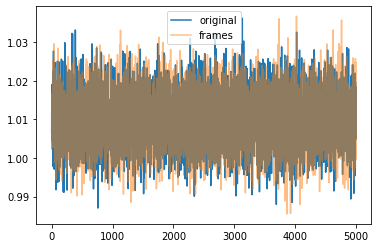

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(5000), pct.history['PermShk'].mean(axis=1), label = 'original')
plt.plot(range(5000), pcft.history['PermShk'].mean(axis=1), label = 'frames', alpha = 0.5)
plt.legend()

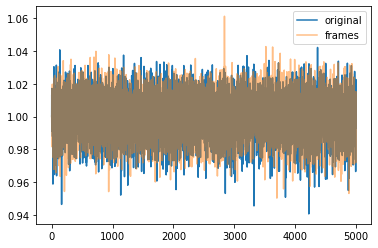

In [8]:
plt.plot(range(5000), pct.history['TranShk'].mean(axis=1), label = 'original')
plt.plot(range(5000), pcft.history['TranShk'].mean(axis=1), label = 'frames', alpha = 0.5)
plt.legend()

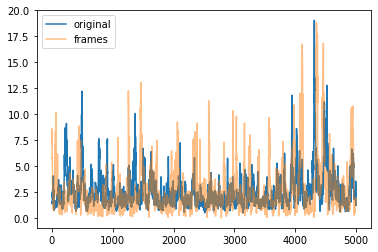

In [9]:
plt.plot(range(5000), pct.history['bNrm'].mean(axis=1), label = 'original')
plt.plot(range(5000), pcft.history['bNrm'].mean(axis=1), label = 'frames', alpha = 0.5)
plt.legend()

In [10]:
#plt.plot(range(5000), pct.history['Risky'].mean(axis=1), label = 'original')
#plt.plot(range(5000), pcft.history['Risky'].mean(axis=1), label = 'frames', alpha = 0.5)
#plt.legend()

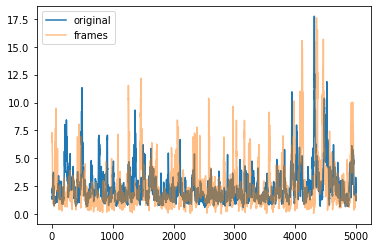

In [11]:
plt.plot(range(5000), pct.history['aNrm'].mean(axis=1), label = 'original')
plt.plot(range(5000), pcft.history['aNrm'].mean(axis=1), label = 'frames', alpha = 0.5)
plt.legend()

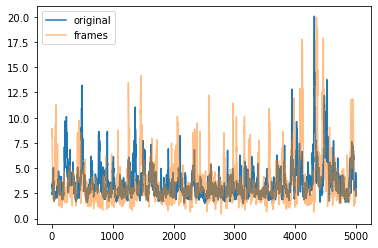

In [12]:
plt.plot(range(5000), pct.history['mNrm'].mean(axis=1), label = 'original')
plt.plot(range(5000), pcft.history['mNrm'].mean(axis=1), label = 'frames', alpha = 0.5)
plt.legend()

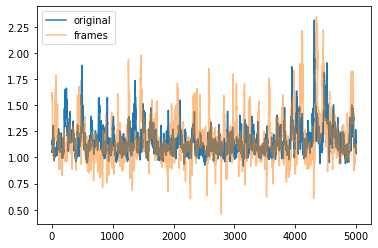

In [13]:
plt.plot(range(5000), pct.history['cNrm'].mean(axis=1), label = 'original')
plt.plot(range(5000), pcft.history['cNrm'].mean(axis=1), label = 'frames', alpha = 0.5)
plt.legend()

**TODO**: Handly Risky as an aggregate value.

In [14]:
#pct.history['Risky'][:3, :3]

In [15]:
#pcft.history['Risky'][:3, :3]

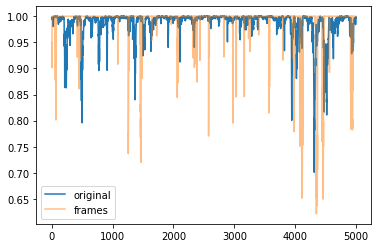

In [16]:
plt.plot(range(5000), pct.history['Share'].mean(axis=1), label = 'original')
plt.plot(range(5000), pcft.history['Share'].mean(axis=1), label = 'frames', alpha = 0.5)
plt.legend()

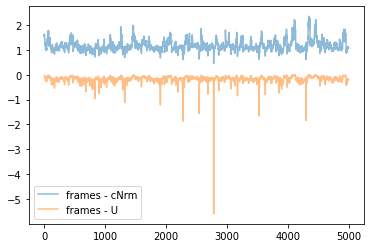

In [17]:
plt.plot(range(5000), pcft.history['cNrm'].mean(axis=1), label = 'frames - cNrm', alpha = 0.5)
plt.plot(range(5000), pcft.history['U'].mean(axis=1), label = 'frames - U', alpha = 0.5)
plt.legend()

In [18]:
pcft.history['U']

array([[-0.03637081, -0.03637081, -0.03637081, ..., -0.03637081,
        -0.03637081, -0.03637081],
       [-0.0425601 , -0.0425601 , -0.0425601 , ..., -0.0425601 ,
        -0.0425601 , -0.0425601 ],
       [-0.03984171, -0.03984171, -0.03984171, ..., -0.03984171,
        -0.03984171, -0.03984171],
       ...,
       [-0.16541513, -0.16541513, -0.16541513, ..., -0.16541513,
        -0.16541513, -0.16541513],
       [-0.16966095, -0.16966095, -0.16966095, ..., -0.16966095,
        -0.16966095, -0.16966095],
       [-0.19054745, -0.19054745, -0.19054745, ..., -0.19054745,
        -0.19054745, -0.19054745]])

In [19]:
pcft.history['U'].mean(axis=1)

array([-0.03637081, -0.0425601 , -0.03984171, ..., -0.16541513,
       -0.16966095, -0.19054745])

In [20]:
pcft.history['U'][0,:]

array([-0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03

In [21]:
pcft.history['cNrm'][0,:]

array([1.61918606, 1.61918606, 1.61918606, 1.61918606, 1.61918606,
       1.61918606, 1.61918606, 1.61918606, 1.61918606, 1.61918606,
       1.61918606, 1.61918606, 1.61918606, 1.61918606, 1.61918606,
       1.61918606, 1.61918606, 1.61918606, 1.61918606, 1.61918606,
       1.61918606, 1.61918606, 1.61918606, 1.61918606, 1.61918606,
       1.61918606, 1.61918606, 1.61918606, 1.61918606, 1.61918606,
       1.61918606, 1.61918606, 1.61918606, 1.61918606, 1.61918606,
       1.61918606, 1.61918606, 1.61918606, 1.61918606, 1.61918606,
       1.61918606, 1.61918606, 1.61918606, 1.61918606, 1.61918606,
       1.61918606, 1.61918606, 1.61918606, 1.61918606, 1.61918606,
       1.61918606, 1.61918606, 1.61918606, 1.61918606, 1.61918606,
       1.61918606, 1.61918606, 1.61918606, 1.61918606, 1.61918606,
       1.61918606, 1.61918606, 1.61918606, 1.61918606, 1.61918606,
       1.61918606, 1.61918606, 1.61918606, 1.61918606, 1.61918606,
       1.61918606, 1.61918606, 1.61918606, 1.61918606, 1.61918

In [22]:
pcft.parameters['CRRA']

5.0

In [23]:
CRRAutility(pcft.history['cNrm'][0,:], 5)

array([-0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03637081,
       -0.03637081, -0.03637081, -0.03637081, -0.03637081, -0.03

In [24]:
pcft.frames[4].parents

[]

# Visualizing the Transition Equations

In [25]:
import networkx as nx

In [26]:
g = nx.DiGraph()

g.add_nodes_from([
    (frame.name(), 
     {'control' : frame.control, 'reward' : frame.reward, 'aggregate' : frame.aggregate})
    for frame in pcft.frames
])

for frame in pcft.frames:
    for child in frame.children:
        g.add_nodes_from([
            (child.name(), 
             {
                 'control' : child.control,
                 'reward' : child.reward,
                 'aggregate' : child.aggregate
             })])
        g.add_edge(frame.name(), child.name())

{'PermShkAgg': Text(0.3257977125142919, 0.2205995332434148, 'PermShkAgg'),
 'PermShk': Text(0.4060880809815744, 0.34863988375199145, 'PermShk'),
 'TranShk': Text(-0.03052799983721445, 0.346226274404551, 'TranShk'),
 'Risky': Text(0.11994784800249886, 1.0, 'Risky'),
 'Adjust': Text(-0.2699267235063822, 0.1253399509565807, 'Adjust'),
 'Rport': Text(0.06583243219264512, 0.6730653866774893, 'Rport'),
 'PlvlAgg': Text(0.08170578784497678, 0.0042652800413652105, 'PlvlAgg'),
 'pLvl': Text(0.40604615816439776, -0.013477022620611533, 'pLvl'),
 'bNrm': Text(0.04894186069135175, 0.3334303846227056, 'bNrm'),
 'mNrm': Text(-0.1226416271332828, 0.016817985181007092, 'mNrm'),
 'Share': Text(-0.5095118402698446, -0.044246423448838244, 'Share'),
 'cNrm': Text(-0.2693019895101743, -0.24638371057601682, 'cNrm'),
 'U': Text(-0.2849830776429623, -0.5863900753869798, 'U'),
 'aNrm': Text(0.058995171582763725, -0.32189607413903704, 'aNrm'),
 'aLvl': Text(0.4061440306900172, -0.37558693126005605, 'aLvl'),
 "Pl

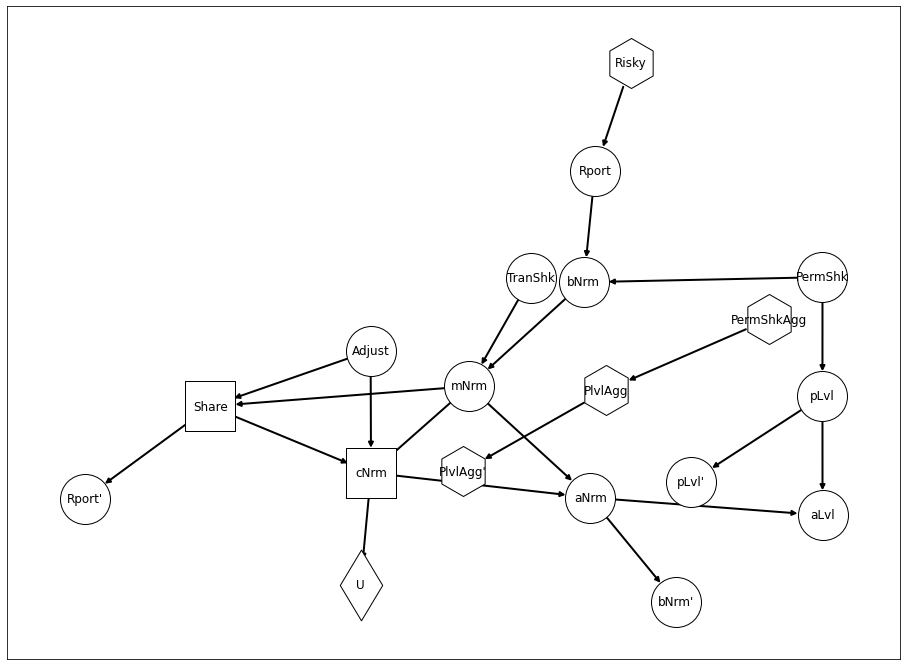

In [27]:
pos = nx.drawing.layout.kamada_kawai_layout(g)

node_options = {
    "node_size": 2500,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "pos" : pos
}

edge_options = {
    "node_size": 2500,
    "width": 2,
    "pos" : pos
}

label_options = {
    "font_size": 12,
     #"labels" : {node : str(node[0]) if len(node) == 1 else str(node) for node in g.nodes},
    "pos" : pos
}


reward_nodes = [k for k,v in g.nodes(data = True) if v['reward']]
control_nodes = [k for k,v in g.nodes(data = True) if v['control']]
aggregate_nodes = [k for k,v in g.nodes(data = True) if v['aggregate']]

chance_nodes = [node for node in g.nodes() 
                if node not in reward_nodes 
                and node not in control_nodes
                and node not in aggregate_nodes
               ]

plt.figure(figsize=(16,12))

nx.draw_networkx_nodes(g, nodelist = chance_nodes, node_shape = 'o', **node_options)
nx.draw_networkx_nodes(g, nodelist = reward_nodes, node_shape = 'd', **node_options)
nx.draw_networkx_nodes(g, nodelist = control_nodes, node_shape = 's', **node_options)
nx.draw_networkx_nodes(g, nodelist = aggregate_nodes, node_shape = 'h', **node_options)
nx.draw_networkx_edges(g, **edge_options)

nx.draw_networkx_labels(g, **label_options)



Note that in the HARK `ConsIndShockModel`, from which the `ConsPortfolio` model inherits, the aggregate permanent shocks are considered to be portions of the permanent shocks experienced by the agents, not additions to those idiosyncratic shocks. Hence, they do not show up directly in the problem solved by the agent. This explains why the aggregate income levels are in a separarte component of the graph.

# Building the Solver [INCOMPLETE]

Preliminery work towards a generic solver for FramedAgentTypes.

In [28]:
controls = [frame for frame in pcft.frames if frame.control]

In [29]:
def get_expected_return_function(control):
    # Input: a control frame
    # Returns: function of the control variable (control frame target)
    #      that returns the expected return, which is
    #          the sum of:
    #              - direct rewards
    #              - expected value of next-frame states (not yet implemented)
    #
    
    rewards = [child for child in control.children if child.reward]
    expected_values = [] # TODO
    
    ## note: function signature is what's needed for scipy.optimize
    def expected_return_function(x, *args):
        ##   returns the sum of 
        ##     the reward functions evaluated in context of
        ##       - parameters
        ##       - the control variable input
        
        # x - array of inputs, here the control frame target
        # args - a tuple of other parameters needed to complete the function
        
        expected_return = 0
        
        for reward in rewards:
            ## TODO: figuring out the ordering of `x` and `args` needed for multiple downstream scopes
            
            
            local_context = {}
            
            # indexing through the x and args values
            i = 0
            num_control_vars = None
            
            # assumes that all frame scopes list model variables first, parameters later
            # should enforce or clarify at the frame level.
            for var in reward.scope:
                if var in control.target:
                    local_context[var] = x[i]
                    i = i + 1
                elif var in pcft.parameters:
                    if num_control_vars is None:
                        num_control_vars = i
                    
                    local_context[var] = args[i - num_control_vars]
                    i = i + 1
                    
            # can `self` be implicit here?
            expected_return += reward.transition(reward, **local_context)
        
        return expected_return
    
    return expected_return_function            

In [30]:
def optimal_policy_function(control):
    
    erf = get_expected_return_function(control)
    constraints = control.constraints ## these will reference the context of the control transition, including scope
    
    ## Returns function:
    ##   input: control frame scope
    ##   output: result of scipy.optimize of the erf with respect to constraints
    ##           getting the optimal input (control variable) value
    return func
    

In [31]:
def approximate_optimal_policy_function(control, grid):
    ## returns a new function:
    ##   that is an interpolation over optimal_policy_function
    ##   over the grid
    
    return func

# Solving methods on the Frame, FrameAgentType

# Using Frame Solution in simulation and comparing result.